# Classification

Download sample MNIST data

In [115]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [116]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [117]:
X.shape, y.shape

((70000, 784), (70000,))

Plotting Sample Data

(-0.5, 27.5, 27.5, -0.5)

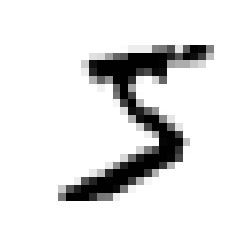

In [118]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.imshow( X[0].reshape(28, 28), cmap='binary')
plt.axis('off')

In [119]:
import numpy as np
y = y.astype(np.uint8)

In [120]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Train with SGD Classifier

Only do Binary of 5 or not-5

In [121]:
y_test_5 = y_test == 5
y_train_5 = y_train == 5

In [122]:
from sklearn.linear_model import SGDClassifier

In [123]:
sgd = SGDClassifier(random_state=4, tol=1000)
sgd.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=4, shuffle=True, tol=1000,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [124]:
sgd.predict(X[:10]), y_train_5[:10] ## Always put an array in predict

(array([ True, False, False, False, False, False, False, False, False,
        False]),
 array([ True, False, False, False, False, False, False, False, False,
        False]))

In [125]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd, X_train, y_train_5, cv=3, scoring='accuracy')

## High Accuracy, but at what cost?

array([0.9597 , 0.96405, 0.9552 ])

## Confusion Matrix

In [126]:
from sklearn.model_selection import cross_val_predict

# Just like cross_val_score, but return the predictions
y_train_pred = cross_val_predict(sgd, X_train, y_train_5, cv=3) 

In [127]:
y_train_pred.shape, y_train.shape # Note: same shape, uses prediction from K-fold concatinated in chunks

((60000,), (60000,))

In [128]:
"""
(Actual,Predicted)

      (-)  <- Predicted -> (+)
      ------------------------------------------------
 -    | True Negative  (-,-)  | False Positive (-,+) |
      ------------------------------------------------
 +    | False Netative (+,-) | True Positive  (+,+)  |
      ------------------------------------------------
Actual

"""

from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_train_5, y_train_pred)
conf

array([[53635,   944],
       [ 1477,  3944]])

In [129]:
(tn, fp), (fn , tp) = conf

In [130]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [131]:
# Precision - True positives ratio with false positive in consideration
precision_score(y_train_5, y_train_pred), tp / (tp + fp)

(0.806873977086743, 0.806873977086743)

In [132]:
# Recall - True positives ratio with false negatives (rejected values that shouldn't) in consideration
recall_score(y_train_5, y_train_pred), tp / (tp + fn)

(0.7275410440878067, 0.7275410440878067)

In [133]:
#Accuracy - right answers / counts
np.sum(y_train_5 == y_train_pred) / y_train_pred.shape[0], (tp + tn) / y_train_pred.shape[0]

(0.95965, 0.95965)

In [134]:
f1_score(y_train_5, y_train_pred)

0.7651566592297993